In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from entot.data.data import create_gaussians, create_gaussian_split
from entot.models.models import DiscreteOTModel, SeguyModel, SinkhornModel
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp

In [3]:
n_x = 100
n_y = 100
x = np.linspace(-0.3, 1.2, n_x)
y = np.linspace(-0.5, 0.5, n_y)
xx, yy = np.meshgrid(x,y)

x_fl = xx.flatten()
y_fl = yy.flatten()

concat = jnp.transpose(jnp.concatenate((jnp.atleast_2d(x_fl), jnp.atleast_2d(y_fl)), axis=0))
concat.shape

(10000, 2)

# Dataset 1

This notebook was created *without* the loss term to match distributions

In [4]:
source, target = create_gaussians(100, 100, var_source=0.2, var_target=0.2)

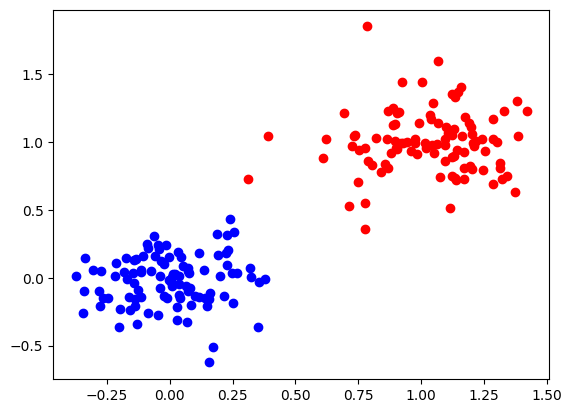

In [5]:
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")

In [10]:
sm = SinkhornModel(0.01, 64, 64, iterations=1000, input_dim=2)
sm(source, target)
#sm.learn_barycentric_projection(n_iters=1000)

100%|██████████| 1000/1000 [02:54<00:00,  5.72it/s]


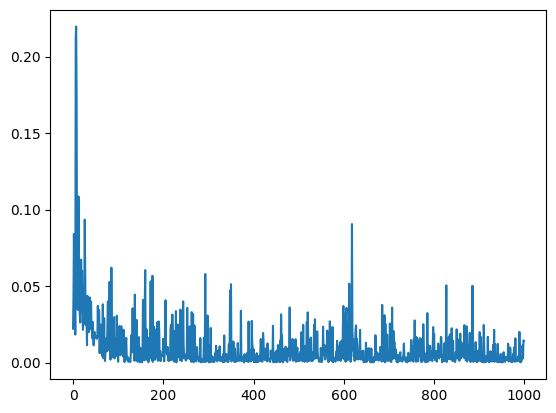

In [15]:
plt.plot(np.arange(len(sm.metrics["f"])), sm.metrics["f"])

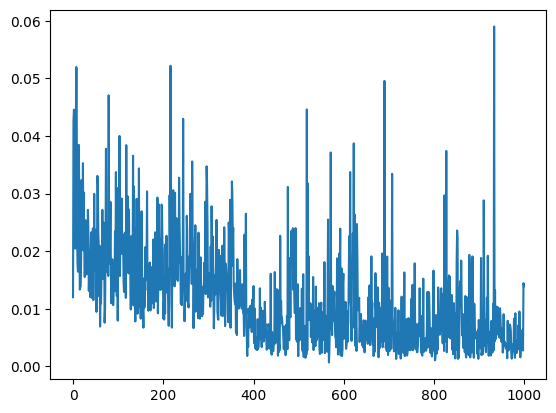

In [16]:
plt.plot(np.arange(len(sm.metrics["g"])), sm.metrics["g"])

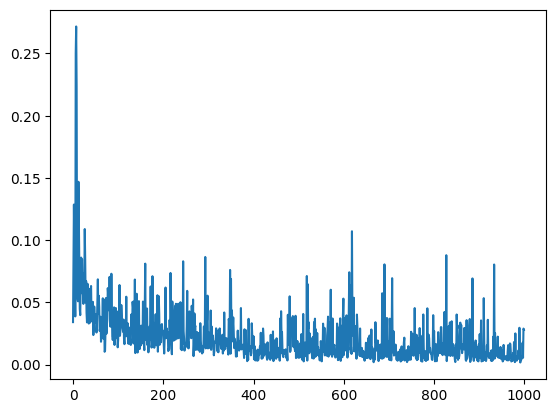

In [17]:
plt.plot(np.arange(len(sm.metrics["obj"])), sm.metrics["obj"])

In [18]:
transported = sm.transport()

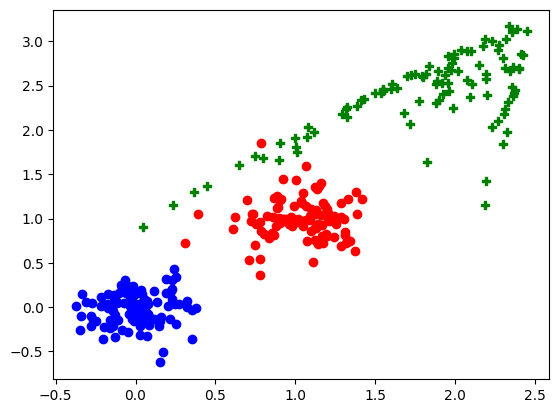

In [19]:
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")
plt.scatter(transported[:, 0], transported[:, 1], color="green", marker="P")

In [17]:
hessian_source = sm.get_hessians_f(source)

In [19]:
traces = jnp.trace(hessian_source, axis1=1, axis2=2)
sizes = jnp.maximum(traces, 0.5)
erroneous = np.asarray(traces < 0)

In [22]:
traces

Array([-4.284692 , -4.240741 , -4.4227476, -4.120795 , -4.1391926,
       -4.2510777, -4.4374666, -3.8639717, -4.2266064, -4.4597025,
       -3.8174715, -4.0915484, -4.169099 , -4.2224317, -3.6765523,
       -4.223003 , -4.473424 , -4.1118   , -3.9021063, -4.350417 ,
       -3.9837372, -4.2563224, -3.8468246, -3.3532252, -4.3705335,
       -4.1683507, -4.404748 , -4.393992 , -3.9604886, -4.090273 ,
       -4.4790025, -3.9891832, -3.9980218, -3.7411392, -4.234194 ,
       -4.1236944, -4.257564 , -4.068179 , -4.0952296, -3.7625341,
       -4.5169144, -4.2704506, -3.519083 , -4.1279726, -3.6838605,
       -4.491499 , -3.6040175, -3.9524984, -3.84286  , -3.7941034,
       -4.5261483, -4.1927223, -4.1294584, -3.728686 , -4.2555637,
       -4.334097 , -3.400409 , -4.4777756, -3.5728316, -4.1259384,
       -3.4884477, -3.7628212, -2.6626785, -4.320107 , -4.4097567,
       -4.1762886, -4.351828 , -4.1435933, -4.377074 , -4.4262543,
       -4.485465 , -4.237043 , -4.462015 , -4.147432 , -3.6451

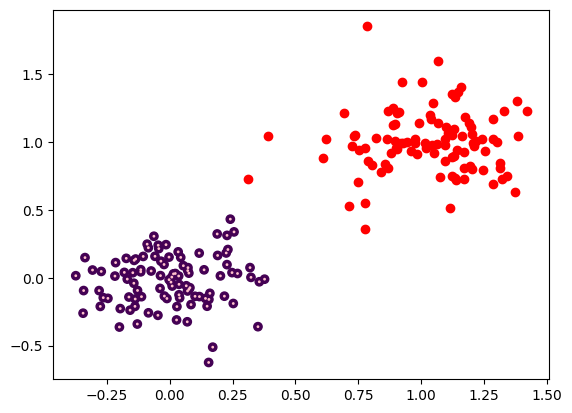

In [20]:
plt.scatter(source[:,0], source[:,1], c=sizes)
plt.scatter(source[:,0], source[:,1], color="pink", s=np.asarray(erroneous).astype(float))
plt.scatter(target[:, 0], target[:, 1], color="red")

In [11]:
dot.output.f.mean(), dot.output.g.mean()

(Array(0.7782942, dtype=float32), Array(1.3210815, dtype=float32))

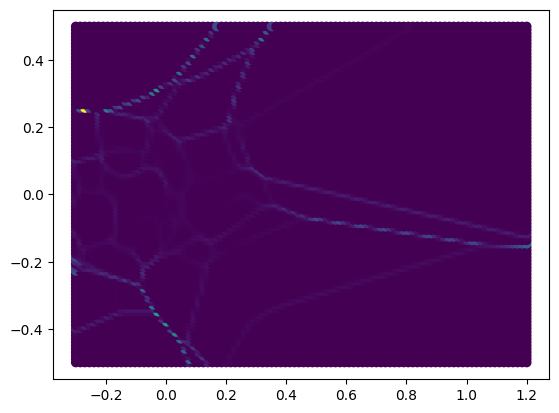

In [12]:
hessian_f = dot.get_hessians_f(concat)

traces = jnp.trace(hessian_f, axis1=1, axis2=2)
sizes = jnp.maximum(traces, 0.5)
erroneous = np.asarray(traces < 0)#.astype(float)

plt.scatter(concat[:,0], concat[:,1], c=sizes)

# Dataset 2

In [13]:
source, target = create_gaussian_split(100, 90, var_source=0.1, var_target=0.1, seed=1)

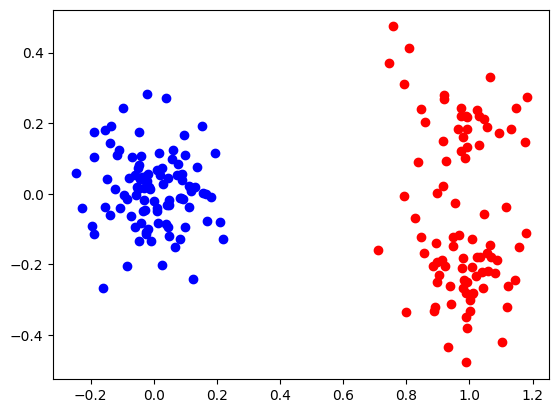

In [14]:
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")

In [15]:
dot = DiscreteOTModel(epsilon=1e-3)
dot(source, target)
dot_transported = dot.transport()

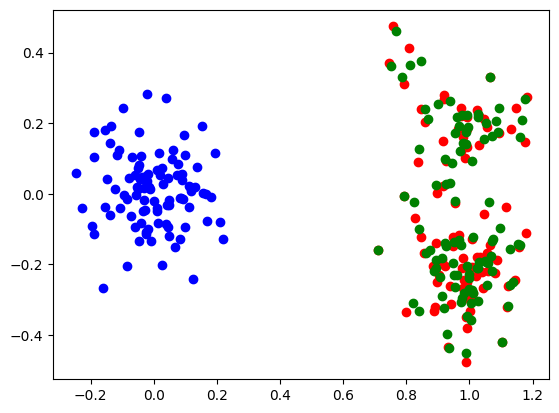

In [16]:
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")
plt.scatter(dot_transported[:, 0], dot_transported[:, 1], color="green")

In [17]:
hessian_source = dot.get_hessians_f(source)

In [18]:
traces = jnp.trace(hessian_source, axis1=1, axis2=2)
sizes = jnp.maximum(traces, 0.5)
erroneous = np.asarray(traces < 0)#.astype(float)

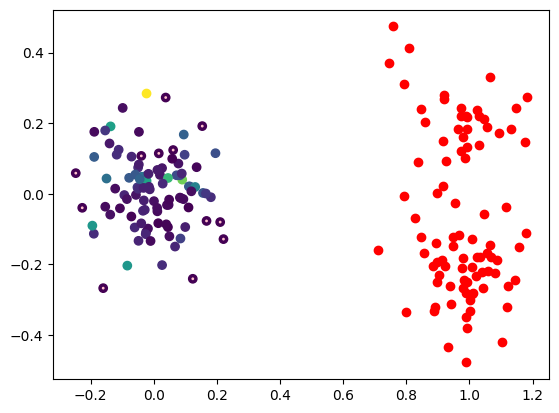

In [19]:
plt.scatter(source[:,0], source[:,1], c=sizes)
plt.scatter(source[:,0], source[:,1], color="pink", s=np.asarray(erroneous).astype(float))
plt.scatter(target[:, 0], target[:, 1], color="red")

In [20]:
hessian_f = dot.get_hessians_f(concat)

In [21]:
traces = jnp.trace(hessian_f, axis1=1, axis2=2)
sizes = jnp.maximum(traces, 0.5)
erroneous = np.asarray(traces < 0)#.astype(float)

In [22]:
sizes.max(), sizes.min()

(Array(118.09283, dtype=float32), Array(0.5, dtype=float32))

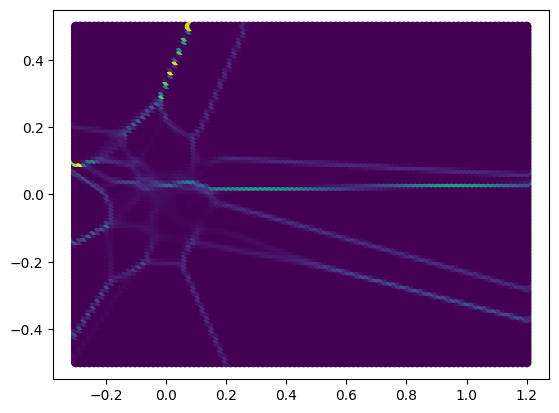

In [23]:
plt.scatter(concat[:,0], concat[:,1], c=sizes)


In [20]:
sm = SeguyModel(1.0, 64, 64, iterations=5, input_dim=2)

In [21]:
sm = SeguyModel(1.0, 64, 64, iterations=5, input_dim=2)
sm(source, target)
sm.learn_barycentric_projection(n_iters=10)

100%|██████████| 5/5 [00:00<00:00,  8.49it/s]


In [22]:
sm.learn_barycentric_projection(n_iters=10)

100%|██████████| 10/10 [00:01<00:00,  6.74it/s]


{'loss': Array(-66.60712, dtype=float32),
 'd_xy': Array([2.367733 , 3.182721 , 2.202586 , ..., 2.92908  , 2.6847882,
        2.7231774], dtype=float32),
 'H': Array([3.3374944, 3.5074499, 3.7258317, ..., 3.3508005, 3.3574204,
        3.575134 ], dtype=float32)}